# Network of networks

Networks where created, this networks have topologies and functions. The topological and dynamic distance was compared.

Each network has a name that corresponds to: 
* MOTIF: motif of network
* ID, ID: parameter of order
* MODEL: Number of model/function

Only comparisons between different networks where taken into account.

In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

## Funtional Loops

Distribution of fun_loops by motif

    C GEN4 +
    D GEN3 +
    E GEN3 + GEN4 +
    F GEN3 GEN4 + GEN3 +
    G GEN3 GEN4 - GEN3 +
    H GEN3 GEN4 + GEN4 +
    I GEN3 GEN4 - GEN4 +
    J GEN1 GEN2 - GEN1 +

In [2]:
loops = []
df_loops = pd.DataFrame(index=[1,2,3,4], columns=['C','D','E','F','G','H','I','J'])
df_loops = df_loops.fillna(0)
with open("5nodos/Loops_Functionality.csv") as f:
    for line in f.readlines(): 
        line = line.strip().split(',')
        if line[-1] != '': 
            loops.append(   (int(line[0]), line[1])   )
            m = int(line[0][0])
            df_loops[line[1]][m] += 1    
df_loops

,C,D,E,F,G,H,I,J
1,184,172,8,8,8,20,20,16
2,184,172,8,8,8,20,20,16
3,188,180,8,8,8,20,20,16
4,188,180,8,8,8,20,20,16


Este patrón esta raro, por que todos los motifs tienen una distribución similar de loops funcionales, para 3 nodos no fue asi. 

## Distance distribution

Distribution of topological distances

Create histograms

In [3]:
#d_top = {}
#d_dyn = {}
#d_vs_d = {}

#with open("5nodos/crossdistances.out") as f:
#    for line in f:
#        line = line.strip().split(',')
#        if line[2] in d_top: d_top[line[2]] += 1
#        else: d_top[line[2]] = 1
#        if line[3] in d_dyn: d_dyn[line[3]] += 1
#        else: d_dyn[line[3]] = 1
#        if (line[2], line[3]) in d_vs_d: d_vs_d[(line[2], line[3])] += 1
#        else: d_vs_d[(line[2], line[3])] = 1
with open("5nodos/res5nodos.dat") as f:
    for line in f: exec(line)

sorted(d_top, key=lambda key:d_top[key])
sorted(d_dyn, key=lambda key:d_dyn[key])
sorted(d_vs_d, key=lambda key:d_vs_d[key])

print(' ')


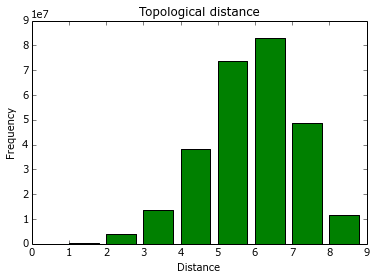

In [4]:
plt.bar(list(d_top.keys()), list(d_top.values()), color='g' )
plt.title("Topological distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

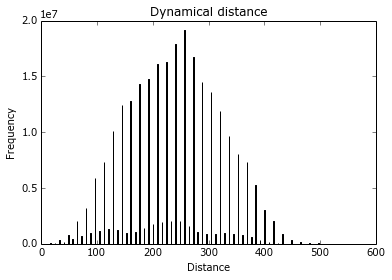

In [5]:
plt.bar(list(d_dyn.keys()), list(d_dyn.values()), width=1, color='b' )
plt.title("Dynamical distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

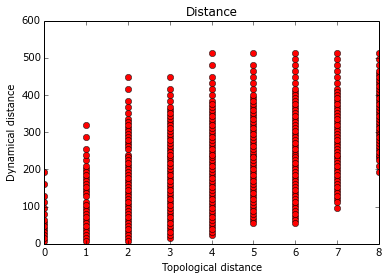

In [6]:
x = [d[0] for d in d_vs_d.keys()]
y = [d[1] for d in d_vs_d.keys()]
plt.plot(x, y, 'ro')
plt.title("Distance")
plt.xlabel("Topological distance")
plt.ylabel("Dynamical distance")
plt.show()

## Network

Separate d_top = 0 and create network

In [7]:
import networkx as nx

G0 = nx.Graph()
G0.add_edges_from(edges_0)
len(G0.nodes())
G0.edges(data=True)
len(G0.nodes())

20388

Add functional loops data

In [8]:
color = { 'C':'red', 'D':'green', 'E':'orange', 'F':'cyan', 
    'G':'purple', 'H':'brown', 'I':'olive', 'J':'blue' }

for n in G0.nodes(): G0.node[n]['color']='grey'
for n, m in loops:
    if n in G0.nodes(): 
        G0.node[n]['loop']=m
        G0.node[n]['color']=color[m]
G0.nodes(data=True)

[(301368, {'color': 'grey'}),
 (103766, {'color': 'grey'}),
 (301152, {'color': 'grey'}),
 (401536, {'color': 'grey'}),
 (300375, {'color': 'grey'}),
 (400445, {'color': 'grey'}),
 (404141, {'color': 'grey'}),
 (103768, {'color': 'grey'}),
 (302241, {'color': 'grey'}),
 (103769, {'color': 'grey'}),
 (404810, {'color': 'grey'}),
 (103770, {'color': 'grey'}),
 (401149, {'color': 'grey'}),
 (103771, {'color': 'grey'}),
 (301153, {'color': 'grey'}),
 (401537, {'color': 'grey'}),
 (103772, {'color': 'grey'}),
 (404146, {'color': 'grey'}),
 (202077, {'color': 'grey'}),
 (305843, {'color': 'grey'}),
 (103774, {'color': 'grey'}),
 (404148, {'color': 'grey'}),
 (404149, {'color': 'grey'}),
 (103776, {'color': 'grey'}),
 (301154, {'color': 'grey'}),
 (401538, {'color': 'grey'}),
 (103777, {'color': 'grey'}),
 (401970, {'color': 'grey'}),
 (400447, {'color': 'grey'}),
 (202082, {'color': 'grey'}),
 (300387, {'color': 'grey'}),
 (402843, {'color': 'grey'}),
 (305849, {'color': 'grey'}),
 (404812, 

Separate in components

In [9]:
data0 = []
for G in nx.connected_components(G0):
    l = []
    for n in G:
        if 'loop' in G0.node[n]:
            l.append(  G0.node[n]['loop']  )
            m = int(str(n)[0])
    l = ''.join(sorted(l))
    if len(l)>0: data0.append([m, len(G), l])
len(data0)

896

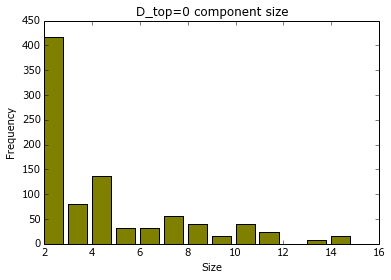

In [10]:
sizes = [d[1] for d in data0]
sizes = {s:sizes.count(s) for s in set(sizes)}
sizes

plt.bar(list(sizes.keys()), list(sizes.values()), color='olive' )
plt.title("D_top=0 component size")
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.show()

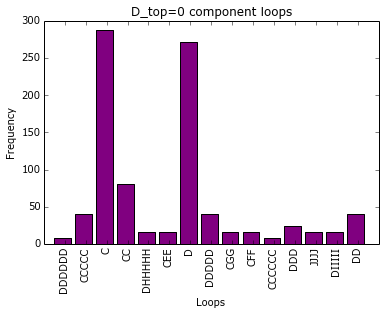

In [11]:
loops = [d[2] for d in data0]
loops = {l:loops.count(l) for l in set(loops)}
loops

plt.bar(np.arange(0.5,len(loops)+.5,1), list(loops.values()), color='purple' )
plt.title("D_top=0 component loops")
plt.xlabel("Loops")
plt.xticks(range(1,len(loops)+1), list(loops.keys()), rotation='vertical')
plt.ylabel("Frequency")
plt.show()

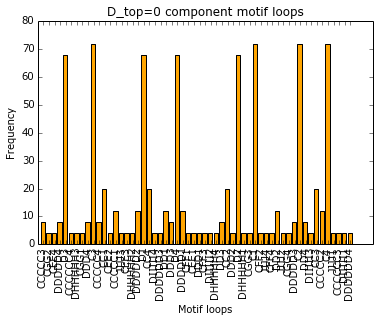

In [12]:
m_loops = [d[2]+str(d[0]) for d in data0]
m_loops = {m:m_loops.count(m) for m in set(m_loops)}
#sorted(m_loops, key=lambda key:m_loops[key])
m_loops

plt.bar(np.arange(0.5,len(m_loops)+.5,1), list(m_loops.values()), color='orange' )
plt.title("D_top=0 component motif loops")
plt.xlabel("Motif loops")
plt.xticks(range(1,len(m_loops)+1), list(m_loops.keys()), rotation='vertical')
plt.ylabel("Frequency")
plt.show()

Functions are equally distributed across motifs.

Plot graph, we'll focus in the motif 1

In [13]:
motif1 = [n for n in G0.nodes() if str(n)[0]=='1' ]
H = G0.subgraph(motif1)
len(H.edges(data=True))

18288

In [14]:
D0_dyn = np.array(nx.to_numpy_matrix(H, weight='weight', nonedge=None))
D0_dyn = np.nanmax(D0_dyn)-D0_dyn #Transform from weight to force.
D0_dyn = np.nan_to_num(D0_dyn)
D0_dyn[0]

array([  0.,  64.,   0., ...,   0.,   0.,   0.])

In [15]:
from matplotlib import colors

color = [G0.node[n]['color'] for n in G0.nodes()]
color = [colors.cnames[c] for c in color]
color = [[int(c[1:3],16), int(c[3:5],16), int(c[5:7],16)] for c in color]
len(color)

20388

In [16]:
from lightning import Lightning
from numpy import random
#lgn = Lightning(ipython=True, local=True)
#lgn.force(D0_dyn, color=color)

<img src="5nodos/Dtop0_funloops.png">

## Dendogram

Clustering!

First, lets get the matrixes and remove nans. The matrixes are in the order of G.nodes()